# Technocolabs Software

# Machine Learning Developer Internship

# Author: EMO SIANI LOIC

# Task: Perform Exploratory Data Analysis based on Spotify Dataset

## 1- Importing libraries

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

C:\Users\lenovo\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\lenovo\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\lenovo\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## 2- Importing Dataset

### a- tf_mini dataset

In [8]:
tf_mini = pd.read_csv('Dataset/tf_mini.csv')

In [9]:
tf_mini.head()

track_id    duration  release_year  \
0  t_a540e552-16d4-42f8-a185-232bd650ea7d  109.706673          1950   
1  t_67965da0-132b-4b1e-8a69-0ef99b32287c  187.693329          1950   
2  t_0614ecd3-a7d5-40a1-816e-156d5872a467  160.839996          1951   
3  t_070a63a0-744a-434e-9913-a97b02926a29  175.399994          1951   
4  t_d6990e17-9c31-4b01-8559-47d9ce476df1  369.600006          1951   

   us_popularity_estimate  acousticness  beat_strength  bounciness  \
0               99.975414      0.458040       0.519497    0.504949   
1               99.969430      0.916272       0.419223    0.545530   
2               99.602549      0.812884       0.425890    0.508280   
3               99.665018      0.396854       0.400934    0.359990   
4               99.991764      0.728831       0.371328    0.335115   

   danceability  dyn_range_mean    energy  ...  time_signature   valence  \
0      0.399767        7.511880  0.817709  ...               4  0.935512   
1      0.491235        9.098376  0.154258  ...               3  0.359675   
2      0.491625        8.368670  0.358813  ...               4  0.726769   
3      0.552227        5.967346  0.514585  ...               4  0.859075   
4      0.483044        5.802681  0.721442  ...               4  0.562343   

   acoustic_vector_0  acoustic_vector_1  acoustic_vector_2  acoustic_vector_3  \
0          -0.033284          -0.411896          -0.028580           0.349438   
1           0.145703          -0.850372           0.123860           0.746904   
2           0.021720          -0.743634           0.333247           0.568447   
3           0.039143          -0.267555          -0.051825           0.106173   
4           0.131931          -0.292523          -0.174819          -0.034422   

  acoustic_vector_4  acoustic_vector_5  acoustic_vector_6  acoustic_vector_7  
0          0.832467          -0.213871          -0.299464          -0.675907  
1          0.371803          -0.420558          -0.213120          -0.525795  
2          0.411094          -0.187749          -0.387599          -0.433496  
3          0.614825          -0.111419          -0.265953          -0.542753  
4          0.717229          -0.016239          -0.392694          -0.455496  

[5 rows x 30 columns]

In [10]:
tf_mini.shape

(50704, 30)

In [11]:
tf_mini.dtypes

track_id                   object
duration                  float64
release_year                int64
us_popularity_estimate    float64
acousticness              float64
beat_strength             float64
bounciness                float64
danceability              float64
dyn_range_mean            float64
energy                    float64
flatness                  float64
instrumentalness          float64
key                         int64
liveness                  float64
loudness                  float64
mechanism                 float64
mode                       object
organism                  float64
speechiness               float64
tempo                     float64
time_signature              int64
valence                   float64
acoustic_vector_0         float64
acoustic_vector_1         float64
acoustic_vector_2         float64
acoustic_vector_3         float64
acoustic_vector_4         float64
acoustic_vector_5         float64
acoustic_vector_6         float64
acoustic_vecto

In [12]:
tf_mini.isnull().sum()

track_id                  0
duration                  0
release_year              0
us_popularity_estimate    0
acousticness              0
beat_strength             0
bounciness                0
danceability              0
dyn_range_mean            0
energy                    0
flatness                  0
instrumentalness          0
key                       0
liveness                  0
loudness                  0
mechanism                 0
mode                      0
organism                  0
speechiness               0
tempo                     0
time_signature            0
valence                   0
acoustic_vector_0         0
acoustic_vector_1         0
acoustic_vector_2         0
acoustic_vector_3         0
acoustic_vector_4         0
acoustic_vector_5         0
acoustic_vector_6         0
acoustic_vector_7         0
dtype: int64

### b- log_mini dataset

In [13]:
log_mini = pd.read_csv('Dataset/log_mini.csv')

In [14]:
log_mini.head()

session_id  session_position  session_length  \
0  0_00006f66-33e5-4de7-a324-2d18e439fc1e                 1              20   
1  0_00006f66-33e5-4de7-a324-2d18e439fc1e                 2              20   
2  0_00006f66-33e5-4de7-a324-2d18e439fc1e                 3              20   
3  0_00006f66-33e5-4de7-a324-2d18e439fc1e                 4              20   
4  0_00006f66-33e5-4de7-a324-2d18e439fc1e                 5              20   

                           track_id_clean  skip_1  skip_2  skip_3  \
0  t_0479f24c-27d2-46d6-a00c-7ec928f2b539   False   False   False   
1  t_9099cd7b-c238-47b7-9381-f23f2c1d1043   False   False   False   
2  t_fc5df5ba-5396-49a7-8b29-35d0d28249e0   False   False   False   
3  t_23cff8d6-d874-4b20-83dc-94e450e8aa20   False   False   False   
4  t_64f3743c-f624-46bb-a579-0f3f9a07a123   False   False   False   

   not_skipped  context_switch  no_pause_before_play  ...  \
0         True               0                     0  ...   
1         True               0                     1  ...   
2         True               0                     1  ...   
3         True               0                     1  ...   
4         True               0                     1  ...   

   long_pause_before_play  hist_user_behavior_n_seekfwd  \
0                       0                             0   
1                       0                             0   
2                       0                             0   
3                       0                             0   
4                       0                             0   

   hist_user_behavior_n_seekback  hist_user_behavior_is_shuffle  hour_of_day  \
0                              0                           True           16   
1                              0                           True           16   
2                              0                           True           16   
3                              0                           True           16   
4                              0                           True           16   

         date premium        context_type hist_user_behavior_reason_start  \
0  2018-07-15    True  editorial_playlist                       trackdone   
1  2018-07-15    True  editorial_playlist                       trackdone   
2  2018-07-15    True  editorial_playlist                       trackdone   
3  2018-07-15    True  editorial_playlist                       trackdone   
4  2018-07-15    True  editorial_playlist                       trackdone   

  hist_user_behavior_reason_end  
0                     trackdone  
1                     trackdone  
2                     trackdone  
3                     trackdone  
4                     trackdone  

[5 rows x 21 columns]

In [15]:
log_mini.shape

(167880, 21)

In [16]:
log_mini.dtypes

session_id                         object
session_position                    int64
session_length                      int64
track_id_clean                     object
skip_1                               bool
skip_2                               bool
skip_3                               bool
not_skipped                          bool
context_switch                      int64
no_pause_before_play                int64
short_pause_before_play             int64
long_pause_before_play              int64
hist_user_behavior_n_seekfwd        int64
hist_user_behavior_n_seekback       int64
hist_user_behavior_is_shuffle        bool
hour_of_day                         int64
date                               object
premium                              bool
context_type                       object
hist_user_behavior_reason_start    object
hist_user_behavior_reason_end      object
dtype: object

In [17]:
log_mini.isnull().sum()

session_id                         0
session_position                   0
session_length                     0
track_id_clean                     0
skip_1                             0
skip_2                             0
skip_3                             0
not_skipped                        0
context_switch                     0
no_pause_before_play               0
short_pause_before_play            0
long_pause_before_play             0
hist_user_behavior_n_seekfwd       0
hist_user_behavior_n_seekback      0
hist_user_behavior_is_shuffle      0
hour_of_day                        0
date                               0
premium                            0
context_type                       0
hist_user_behavior_reason_start    0
hist_user_behavior_reason_end      0
dtype: int64

**After checking on both dataset whether there are missing values or not. We found out that our datasets do not content any missing values so we can merge them by using the  track_id column.
First, we have to rename the column track_id_clean to track_id in the dataset log_mini so it will match exactly the same name as in the tf_mini dataset.**

In [18]:
log_mini.rename(columns={"track_id_clean":"track_id"},inplace=True)

In [19]:
log_mini.columns

Index(['session_id', 'session_position', 'session_length', 'track_id',
       'skip_1', 'skip_2', 'skip_3', 'not_skipped', 'context_switch',
       'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'date', 'premium', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end'],
      dtype='object')

In [20]:
dataset = log_mini.merge(tf_mini,on="track_id")

In [21]:
dataset.head()

session_id  session_position  session_length  \
0  0_00006f66-33e5-4de7-a324-2d18e439fc1e                 1              20   
1  0_00079a23-1600-486a-91bd-5208be0c745a                 7              12   
2  0_012b0fb4-0cc3-429f-9a78-cc6e622153fb                 6              20   
3  0_013cc010-c476-4ad2-8972-73449e0b2ef4                 9              13   
4  0_01a5f0dc-9938-48c9-92f1-c7e51f34d290                 7              12   

                                 track_id  skip_1  skip_2  skip_3  \
0  t_0479f24c-27d2-46d6-a00c-7ec928f2b539   False   False   False   
1  t_0479f24c-27d2-46d6-a00c-7ec928f2b539   False   False    True   
2  t_0479f24c-27d2-46d6-a00c-7ec928f2b539   False   False   False   
3  t_0479f24c-27d2-46d6-a00c-7ec928f2b539   False   False   False   
4  t_0479f24c-27d2-46d6-a00c-7ec928f2b539   False   False    True   

   not_skipped  context_switch  no_pause_before_play  ...  time_signature  \
0         True               0                     0  ...               4   
1        False               0                     0  ...               4   
2         True               0                     0  ...               4   
3         True               0                     1  ...               4   
4        False               0                     0  ...               4   

    valence  acoustic_vector_0  acoustic_vector_1  acoustic_vector_2  \
0  0.152255          -0.815775           0.386409            0.23016   
1  0.152255          -0.815775           0.386409            0.23016   
2  0.152255          -0.815775           0.386409            0.23016   
3  0.152255          -0.815775           0.386409            0.23016   
4  0.152255          -0.815775           0.386409            0.23016   

   acoustic_vector_3 acoustic_vector_4  acoustic_vector_5 acoustic_vector_6  \
0           0.028028         -0.333373           0.015452          -0.35359   
1           0.028028         -0.333373           0.015452          -0.35359   
2           0.028028         -0.333373           0.015452          -0.35359   
3           0.028028         -0.333373           0.015452          -0.35359   
4           0.028028         -0.333373           0.015452          -0.35359   

  acoustic_vector_7  
0          0.205826  
1          0.205826  
2          0.205826  
3          0.205826  
4          0.205826  

[5 rows x 50 columns]

In [22]:
dataset.shape

(167880, 50)

### For better understanding of our dataset, we can display all the columns.

In [23]:
pd.set_option('display.max_columns',50)

In [24]:
dataset.head()

session_id  session_position  session_length  \
0  0_00006f66-33e5-4de7-a324-2d18e439fc1e                 1              20   
1  0_00079a23-1600-486a-91bd-5208be0c745a                 7              12   
2  0_012b0fb4-0cc3-429f-9a78-cc6e622153fb                 6              20   
3  0_013cc010-c476-4ad2-8972-73449e0b2ef4                 9              13   
4  0_01a5f0dc-9938-48c9-92f1-c7e51f34d290                 7              12   

                                 track_id  skip_1  skip_2  skip_3  \
0  t_0479f24c-27d2-46d6-a00c-7ec928f2b539   False   False   False   
1  t_0479f24c-27d2-46d6-a00c-7ec928f2b539   False   False    True   
2  t_0479f24c-27d2-46d6-a00c-7ec928f2b539   False   False   False   
3  t_0479f24c-27d2-46d6-a00c-7ec928f2b539   False   False   False   
4  t_0479f24c-27d2-46d6-a00c-7ec928f2b539   False   False    True   

   not_skipped  context_switch  no_pause_before_play  short_pause_before_play  \
0         True               0                     0                        0   
1        False               0                     0                        1   
2         True               0                     0                        1   
3         True               0                     1                        0   
4        False               0                     0                        1   

   long_pause_before_play  hist_user_behavior_n_seekfwd  \
0                       0                             0   
1                       1                             0   
2                       1                             0   
3                       0                             0   
4                       1                             0   

   hist_user_behavior_n_seekback  hist_user_behavior_is_shuffle  hour_of_day  \
0                              0                           True           16   
1                              0                          False           17   
2                              0                          False           21   
3                              0                          False           18   
4                              0                           True           19   

         date  premium        context_type hist_user_behavior_reason_start  \
0  2018-07-15     True  editorial_playlist                       trackdone   
1  2018-07-15     True  editorial_playlist                          fwdbtn   
2  2018-07-14     True     user_collection                       trackdone   
3  2018-07-15     True  editorial_playlist                          fwdbtn   
4  2018-07-14    False  editorial_playlist                       trackdone   

  hist_user_behavior_reason_end    duration  release_year  \
0                     trackdone  180.066666          2018   
1                       endplay  180.066666          2018   
2                     trackdone  180.066666          2018   
3                     trackdone  180.066666          2018   
4                        fwdbtn  180.066666          2018   

   us_popularity_estimate  acousticness  beat_strength  bounciness  \
0               99.968133      0.015848       0.438551    0.473455   
1               99.968133      0.015848       0.438551    0.473455   
2               99.968133      0.015848       0.438551    0.473455   
3               99.968133      0.015848       0.438551    0.473455   
4               99.968133      0.015848       0.438551    0.473455   

   danceability  dyn_range_mean    energy  flatness  instrumentalness  key  \
0      0.653119        7.660024  0.553465  1.035007          0.003484    1   
1      0.653119        7.660024  0.553465  1.035007          0.003484    1   
2      0.653119        7.660024  0.553465  1.035007          0.003484    1   
3      0.653119        7.660024  0.553465  1.035007          0.003484    1   
4      0.653119        7.660024  0.553465  1.035007          0.003484    1   

   liveness  loudness  mechanism   mode  organism  speechiness       tempo  \
0  0.678553   

In [25]:
dataset.isnull().sum()

session_id                         0
session_position                   0
session_length                     0
track_id                           0
skip_1                             0
skip_2                             0
skip_3                             0
not_skipped                        0
context_switch                     0
no_pause_before_play               0
short_pause_before_play            0
long_pause_before_play             0
hist_user_behavior_n_seekfwd       0
hist_user_behavior_n_seekback      0
hist_user_behavior_is_shuffle      0
hour_of_day                        0
date                               0
premium                            0
context_type                       0
hist_user_behavior_reason_start    0
hist_user_behavior_reason_end      0
duration                           0
release_year                       0
us_popularity_estimate             0
acousticness                       0
beat_strength                      0
bounciness                         0
d

In [26]:
dataset.dtypes

session_id                          object
session_position                     int64
session_length                       int64
track_id                            object
skip_1                                bool
skip_2                                bool
skip_3                                bool
not_skipped                           bool
context_switch                       int64
no_pause_before_play                 int64
short_pause_before_play              int64
long_pause_before_play               int64
hist_user_behavior_n_seekfwd         int64
hist_user_behavior_n_seekback        int64
hist_user_behavior_is_shuffle         bool
hour_of_day                          int64
date                                object
premium                               bool
context_type                        object
hist_user_behavior_reason_start     object
hist_user_behavior_reason_end       object
duration                           float64
release_year                         int64
us_populari

In [27]:
#Function to extract categoricals and numerticals columns from our dataset
def extract_cat_num(df):
    cat_col = [col for col in df.columns if df[col].dtype=='object']
    num_col = [col for col in df.columns if df[col].dtype!='object']
    return cat_col,num_col

In [28]:
cat_col, num_col = extract_cat_num(dataset)

In [29]:
cat_col

['session_id',
 'track_id',
 'date',
 'context_type',
 'hist_user_behavior_reason_start',
 'hist_user_behavior_reason_end',
 'mode']

In [30]:
num_col

['session_position',
 'session_length',
 'skip_1',
 'skip_2',
 'skip_3',
 'not_skipped',
 'context_switch',
 'no_pause_before_play',
 'short_pause_before_play',
 'long_pause_before_play',
 'hist_user_behavior_n_seekfwd',
 'hist_user_behavior_n_seekback',
 'hist_user_behavior_is_shuffle',
 'hour_of_day',
 'premium',
 'duration',
 'release_year',
 'us_popularity_estimate',
 'acousticness',
 'beat_strength',
 'bounciness',
 'danceability',
 'dyn_range_mean',
 'energy',
 'flatness',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mechanism',
 'organism',
 'speechiness',
 'tempo',
 'time_signature',
 'valence',
 'acoustic_vector_0',
 'acoustic_vector_1',
 'acoustic_vector_2',
 'acoustic_vector_3',
 'acoustic_vector_4',
 'acoustic_vector_5',
 'acoustic_vector_6',
 'acoustic_vector_7']

In [31]:
dataset_cat = dataset[cat_col] # Dataset containing all our categorical columns.
dataset_num = dataset[num_col] # Dataset containing all our numerical columns.

### Display the differents values for each categorical column

In [32]:
for col in cat_col:
    print('{} has {} values'.format(col,dataset[col].unique()))
    print('\n')

session_id has ['0_00006f66-33e5-4de7-a324-2d18e439fc1e'
 '0_00079a23-1600-486a-91bd-5208be0c745a'
 '0_012b0fb4-0cc3-429f-9a78-cc6e622153fb' ...
 '0_0e626fa7-dd0f-47d1-97f9-7e2e388237eb'
 '0_0e675aa4-6263-4f38-a1ee-29cadbe0d642'
 '0_0e6bffe8-35f1-4cf1-9633-5ef059d637f2'] values


track_id has ['t_0479f24c-27d2-46d6-a00c-7ec928f2b539'
 't_9099cd7b-c238-47b7-9381-f23f2c1d1043'
 't_fc5df5ba-5396-49a7-8b29-35d0d28249e0' ...
 't_3f71a175-f7ca-4cd4-829d-65fc82b09486'
 't_ac792fc0-a591-4c0f-a03c-652a97a864d2'
 't_76cb529c-86e9-41e2-a136-f5bd97481a9a'] values


date has ['2018-07-15' '2018-07-14' '2018-07-10' '2018-07-11' '2018-07-05'
 '2018-07-13' '2018-06-30' '2018-07-07' '2018-07-04' '2018-07-06'
 '2018-07-12' '2018-07-16' '2018-07-09' '2018-06-29' '2018-05-12'
 '2018-06-05' '2018-05-18' '2018-06-19'] values


context_type has ['editorial_playlist' 'user_collection' 'catalog' 'radio' 'charts'
 'personalized_playlist'] values


hist_user_behavior_reason_start has ['trackdone' 'fwdbtn' 'applo

### Correlation between features

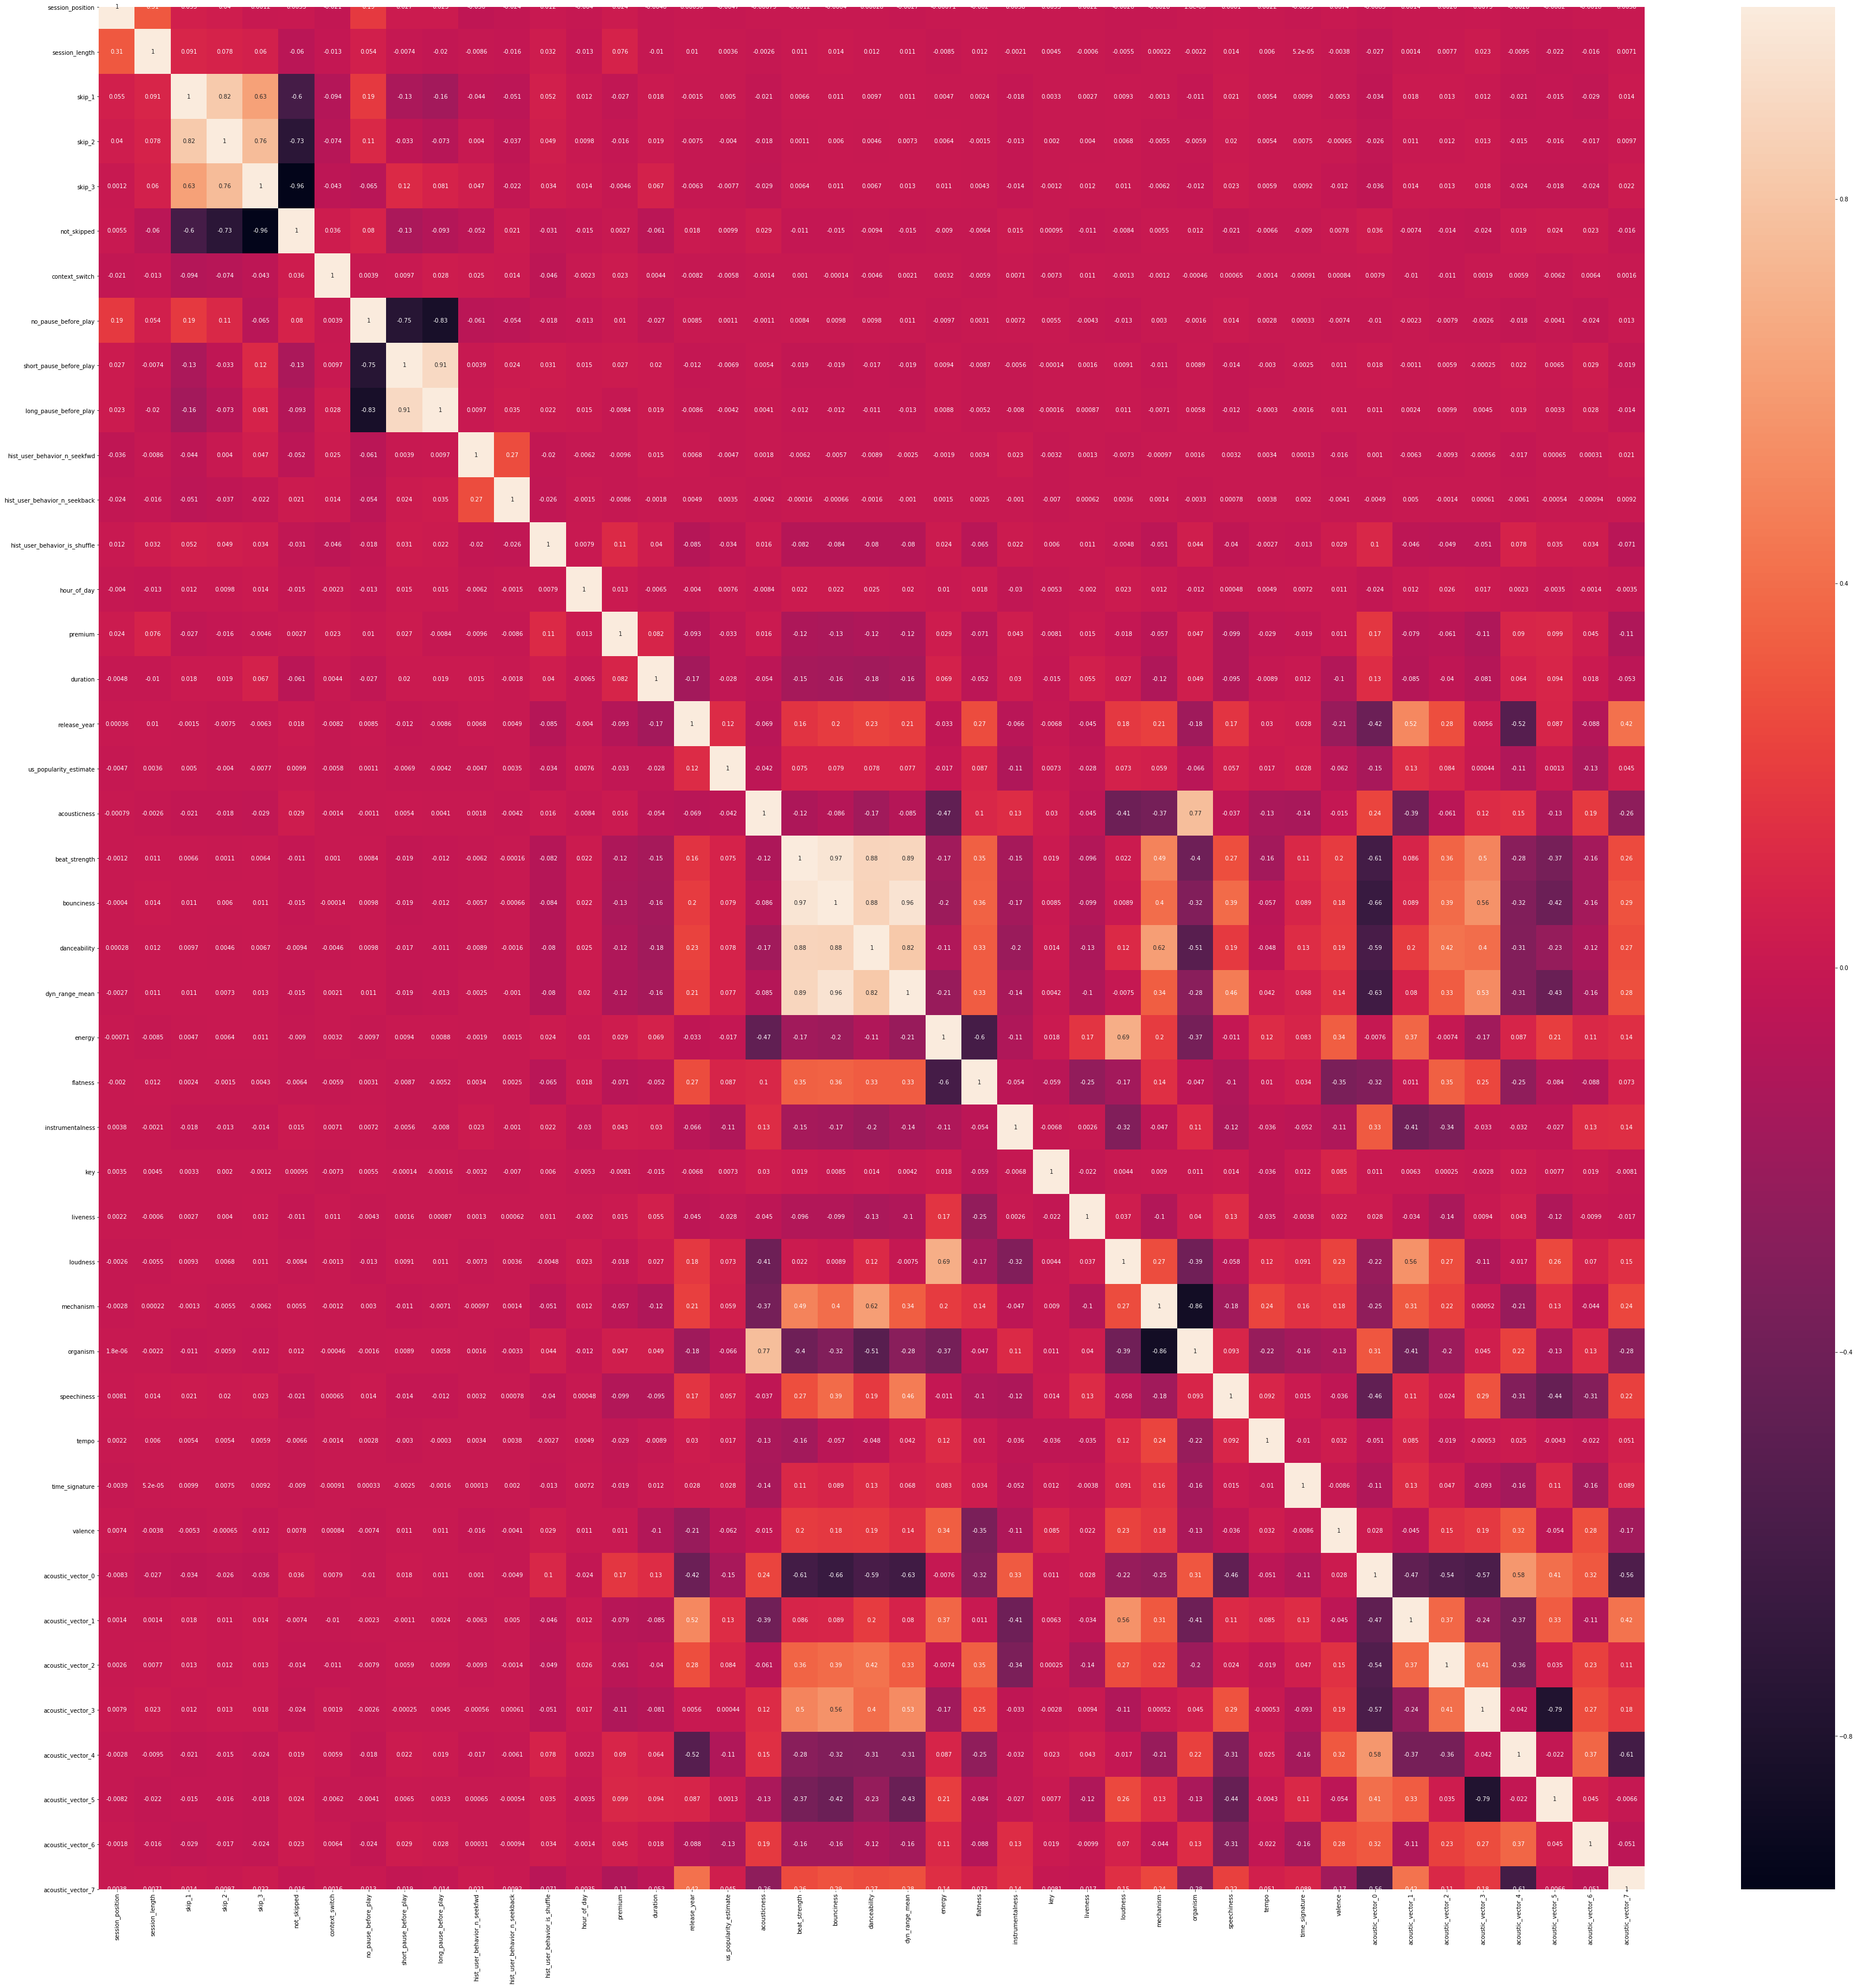

In [33]:
plt.figure(figsize=(60,60))
sns.heatmap(dataset.corr(),annot=True)

For better visualization, we can zoom our heatmap.

In [33]:
!pip install plotly

In [35]:
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

In [36]:
trace = go.Bar(x=dataset.corr()['skip_2'].index,y=dataset.corr()['skip_2'])
iplot([trace])

We can see that there are some variables which are positively highly correlated with **skip_2** column such as **skip_1, skip_3** and **no_pause_before_play.**

### Average duration of a session

In [37]:
dataset['duration'].describe()

count    167880.000000
mean        215.893484
std          60.223626
min          30.013330
25%         183.503403
50%         212.027023
75%         240.800003
max        1787.760986
Name: duration, dtype: float64

### Checking wether we have an imbalanced dataset or not

In [38]:
trace2 = go.Pie(labels=dataset['skip_2'].value_counts().index,values=dataset['skip_2'].value_counts(),hoverinfo='label+percent',textinfo='value')
iplot([trace2])

We can conclude that we have a balanced dataset because both values of our target feature are almost equals.

### We are going to change the type of the  feature 'date' as datetime.

In [39]:
dataset_cat.head()

session_id  \
0  0_00006f66-33e5-4de7-a324-2d18e439fc1e   
1  0_00079a23-1600-486a-91bd-5208be0c745a   
2  0_012b0fb4-0cc3-429f-9a78-cc6e622153fb   
3  0_013cc010-c476-4ad2-8972-73449e0b2ef4   
4  0_01a5f0dc-9938-48c9-92f1-c7e51f34d290   

                                 track_id        date        context_type  \
0  t_0479f24c-27d2-46d6-a00c-7ec928f2b539  2018-07-15  editorial_playlist   
1  t_0479f24c-27d2-46d6-a00c-7ec928f2b539  2018-07-15  editorial_playlist   
2  t_0479f24c-27d2-46d6-a00c-7ec928f2b539  2018-07-14     user_collection   
3  t_0479f24c-27d2-46d6-a00c-7ec928f2b539  2018-07-15  editorial_playlist   
4  t_0479f24c-27d2-46d6-a00c-7ec928f2b539  2018-07-14  editorial_playlist   

  hist_user_behavior_reason_start hist_user_behavior_reason_end   mode  
0                       trackdone                     trackdone  major  
1                          fwdbtn                       endplay  major  
2                       trackdone                     trackdone  major  
3                          fwdbtn                     trackdone  major  
4                       trackdone                        fwdbtn  major

In [40]:
date = pd.to_datetime(dataset_cat['date'])

In [41]:
month = date.dt.month # Select the month of the year

In [42]:
day = date.dt.day # Select the day of the month

In [43]:
dataset_cat.drop("date",axis=1,inplace=True)

In [44]:
dataset_cat['month'] = month
dataset_cat['day'] = day

In [45]:
dataset_cat.head()

session_id  \
0  0_00006f66-33e5-4de7-a324-2d18e439fc1e   
1  0_00079a23-1600-486a-91bd-5208be0c745a   
2  0_012b0fb4-0cc3-429f-9a78-cc6e622153fb   
3  0_013cc010-c476-4ad2-8972-73449e0b2ef4   
4  0_01a5f0dc-9938-48c9-92f1-c7e51f34d290   

                                 track_id        context_type  \
0  t_0479f24c-27d2-46d6-a00c-7ec928f2b539  editorial_playlist   
1  t_0479f24c-27d2-46d6-a00c-7ec928f2b539  editorial_playlist   
2  t_0479f24c-27d2-46d6-a00c-7ec928f2b539     user_collection   
3  t_0479f24c-27d2-46d6-a00c-7ec928f2b539  editorial_playlist   
4  t_0479f24c-27d2-46d6-a00c-7ec928f2b539  editorial_playlist   

  hist_user_behavior_reason_start hist_user_behavior_reason_end   mode  month  \
0                       trackdone                     trackdone  major      7   
1                          fwdbtn                       endplay  major      7   
2                       trackdone                     trackdone  major      7   
3                          fwdbtn                     trackdone  major      7   
4                       trackdone                        fwdbtn  major      7   

   day  
0   15  
1   15  
2   14  
3   15  
4   14

### One hot Encoding on categorical column

In [46]:
context_type = pd.get_dummies(dataset_cat['context_type'],drop_first=True)
hist_user_behavior_reason_start = pd.get_dummies(dataset_cat['hist_user_behavior_reason_start'],drop_first=True)
hist_user_behavior_reason_end = pd.get_dummies(dataset_cat['hist_user_behavior_reason_end'],drop_first=True)
mode = pd.get_dummies(dataset_cat['mode'],drop_first=True)

In [47]:
dataset_cat.drop(["context_type","hist_user_behavior_reason_start","hist_user_behavior_reason_end","mode"],axis=1,inplace=True)

In [48]:
dataset_cat2 = pd.concat([dataset_cat,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,mode],axis=1)

In [49]:
dataset_cat2.drop(['session_id','track_id'],axis=1,inplace=True)

In [50]:
dataset_cat2.head()

month  day  charts  editorial_playlist  personalized_playlist  radio  \
0      7   15       0                   1                      0      0   
1      7   15       0                   1                      0      0   
2      7   14       0                   0                      0      0   
3      7   15       0                   1                      0      0   
4      7   14       0                   1                      0      0   

   user_collection  backbtn  clickrow  endplay  fwdbtn  playbtn  remote  \
0                0        0         0        0       0        0       0   
1                0        0         0        0       1        0       0   
2                1        0         0        0       0        0       0   
3                0        0         0        0       1        0       0   
4                0        0         0        0       0        0       0   

   trackdone  trackerror  clickrow  endplay  fwdbtn  logout  remote  \
0          1           0         0        0       0       0       0   
1          0           0         0        1       0       0       0   
2          1           0         0        0       0       0       0   
3          0           0         0        0       0       0       0   
4          1           0         0        0       1       0       0   

   trackdone  minor  
0          1      0  
1          0      0  
2          1      0  
3          1      0  
4          0      0

### Data Preprocessing: Numerical Feature

In [51]:
dataset_num.head()

session_position  session_length  skip_1  skip_2  skip_3  not_skipped  \
0                 1              20   False   False   False         True   
1                 7              12   False   False    True        False   
2                 6              20   False   False   False         True   
3                 9              13   False   False   False         True   
4                 7              12   False   False    True        False   

   context_switch  no_pause_before_play  short_pause_before_play  \
0               0                     0                        0   
1               0                     0                        1   
2               0                     0                        1   
3               0                     1                        0   
4               0                     0                        1   

   long_pause_before_play  hist_user_behavior_n_seekfwd  \
0                       0                             0   
1                       1                             0   
2                       1                             0   
3                       0                             0   
4                       1                             0   

   hist_user_behavior_n_seekback  hist_user_behavior_is_shuffle  hour_of_day  \
0                              0                           True           16   
1                              0                          False           17   
2                              0                          False           21   
3                              0                          False           18   
4                              0                           True           19   

   premium    duration  release_year  us_popularity_estimate  acousticness  \
0     True  180.066666          2018               99.968133      0.015848   
1     True  180.066666          2018               99.968133      0.015848   
2     True  180.066666          2018               99.968133      0.015848   
3     True  180.066666          2018               99.968133      0.015848   
4    False  180.066666          2018               99.968133      0.015848   

   beat_strength  bounciness  danceability  dyn_range_mean    energy  \
0       0.438551    0.473455      0.653119        7.660024  0.553465   
1       0.438551    0.473455      0.653119        7.660024  0.553465   
2       0.438551    0.473455      0.653119        7.660024  0.553465   
3       0.438551    0.473455      0.653119        7.660024  0.553465   
4       0.438551    0.473455      0.653119        7.660024  0.553465   

   flatness  instrumentalness  key  liveness  loudness  mechanism  organism  \
0  1.035007          0.003484    1  0.678553    -6.577   0.546784  0.320668   
1  1.035007          0.003484    1  0.678553    -6.577   0.546784  0.320668   
2  1.035007          0.003484    1  0.678553    -6.577   0.546784  0.320668   
3  1.035007          0.003484    1  0.678553    -6.577   0.546784  0.320668   
4  1.035007          0.003484    1  0.678553    -6.577   0.546784  0.320668   

   speechiness       tempo  time_signature   valence  acoustic_vector_0  \
0     0.069717  134.024994               4  0.152255          -0.815775   
1     0.069717  134.024994               4  0.152255          -0.815775   
2     0.069717  134.024994               4  0.152255          -0.815775   
3     0.069717  134.024994               4  0.152255          -0.815775   
4     0.069717  134.024994               4  0.152255          -0.815775   

   acoustic_vector_1  acoustic_vector_2  acoustic_vector_3  acoustic_vector_4  \
0           0.386409            0.23016           0.028028          -0.333373   
1           0.386409            0.23016           0.028028          -0.333373   
2           0.386409            0.23016           0.028028          -0.333373   
3           0.386409            0.23016           0.028028          -0.333373   
4           0.386409            0.23016           0.028028          

In [52]:
dataset_num.dtypes

session_position                   int64
session_length                     int64
skip_1                              bool
skip_2                              bool
skip_3                              bool
not_skipped                         bool
context_switch                     int64
no_pause_before_play               int64
short_pause_before_play            int64
long_pause_before_play             int64
hist_user_behavior_n_seekfwd       int64
hist_user_behavior_n_seekback      int64
hist_user_behavior_is_shuffle       bool
hour_of_day                        int64
premium                             bool
duration                         float64
release_year                       int64
us_popularity_estimate           float64
acousticness                     float64
beat_strength                    float64
bounciness                       float64
danceability                     float64
dyn_range_mean                   float64
energy                           float64
flatness        

### We are going to convert our columns with boolean type to integer

In [53]:
bool_features = ['skip_1','skip_2','skip_3','not_skipped','hist_user_behavior_is_shuffle','premium']

In [54]:
for feature in bool_features:
    dataset_num[feature] = dataset_num[feature]*1

In [55]:
dataset_num[bool_features].dtypes

skip_1                           int32
skip_2                           int32
skip_3                           int32
not_skipped                      int32
hist_user_behavior_is_shuffle    int32
premium                          int32
dtype: object

In [56]:
dataset_num.head()

session_position  session_length  skip_1  skip_2  skip_3  not_skipped  \
0                 1              20       0       0       0            1   
1                 7              12       0       0       1            0   
2                 6              20       0       0       0            1   
3                 9              13       0       0       0            1   
4                 7              12       0       0       1            0   

   context_switch  no_pause_before_play  short_pause_before_play  \
0               0                     0                        0   
1               0                     0                        1   
2               0                     0                        1   
3               0                     1                        0   
4               0                     0                        1   

   long_pause_before_play  hist_user_behavior_n_seekfwd  \
0                       0                             0   
1                       1                             0   
2                       1                             0   
3                       0                             0   
4                       1                             0   

   hist_user_behavior_n_seekback  hist_user_behavior_is_shuffle  hour_of_day  \
0                              0                              1           16   
1                              0                              0           17   
2                              0                              0           21   
3                              0                              0           18   
4                              0                              1           19   

   premium    duration  release_year  us_popularity_estimate  acousticness  \
0        1  180.066666          2018               99.968133      0.015848   
1        1  180.066666          2018               99.968133      0.015848   
2        1  180.066666          2018               99.968133      0.015848   
3        1  180.066666          2018               99.968133      0.015848   
4        0  180.066666          2018               99.968133      0.015848   

   beat_strength  bounciness  danceability  dyn_range_mean    energy  \
0       0.438551    0.473455      0.653119        7.660024  0.553465   
1       0.438551    0.473455      0.653119        7.660024  0.553465   
2       0.438551    0.473455      0.653119        7.660024  0.553465   
3       0.438551    0.473455      0.653119        7.660024  0.553465   
4       0.438551    0.473455      0.653119        7.660024  0.553465   

   flatness  instrumentalness  key  liveness  loudness  mechanism  organism  \
0  1.035007          0.003484    1  0.678553    -6.577   0.546784  0.320668   
1  1.035007          0.003484    1  0.678553    -6.577   0.546784  0.320668   
2  1.035007          0.003484    1  0.678553    -6.577   0.546784  0.320668   
3  1.035007          0.003484    1  0.678553    -6.577   0.546784  0.320668   
4  1.035007          0.003484    1  0.678553    -6.577   0.546784  0.320668   

   speechiness       tempo  time_signature   valence  acoustic_vector_0  \
0     0.069717  134.024994               4  0.152255          -0.815775   
1     0.069717  134.024994               4  0.152255          -0.815775   
2     0.069717  134.024994               4  0.152255          -0.815775   
3     0.069717  134.024994               4  0.152255          -0.815775   
4     0.069717  134.024994               4  0.152255          -0.815775   

   acoustic_vector_1  acoustic_vector_2  acoustic_vector_3  acoustic_vector_4  \
0           0.386409            0.23016           0.028028          -0.333373   
1           0.386409            0.23016           0.028028          -0.333373   
2           0.386409            0.23016           0.028028          -0.333373   
3           0.386409            0.23016           0.028028          -0.333373   
4           0.386409            0.23016           0.028028          

### Concatenate our categorical dataset and numerical dataset

In [57]:
final_dataset = pd.concat([dataset_cat2,dataset_num],axis=1)

In [58]:
final_dataset.head()

month  day  charts  editorial_playlist  personalized_playlist  radio  \
0      7   15       0                   1                      0      0   
1      7   15       0                   1                      0      0   
2      7   14       0                   0                      0      0   
3      7   15       0                   1                      0      0   
4      7   14       0                   1                      0      0   

   user_collection  backbtn  clickrow  endplay  fwdbtn  playbtn  remote  \
0                0        0         0        0       0        0       0   
1                0        0         0        0       1        0       0   
2                1        0         0        0       0        0       0   
3                0        0         0        0       1        0       0   
4                0        0         0        0       0        0       0   

   trackdone  trackerror  clickrow  endplay  fwdbtn  logout  remote  \
0          1           0         0        0       0       0       0   
1          0           0         0        1       0       0       0   
2          1           0         0        0       0       0       0   
3          0           0         0        0       0       0       0   
4          1           0         0        0       1       0       0   

   trackdone  minor  session_position  session_length  skip_1  ...  \
0          1      0                 1              20       0  ...   
1          0      0                 7              12       0  ...   
2          1      0                 6              20       0  ...   
3          1      0                 9              13       0  ...   
4          0      0                 7              12       0  ...   

   acousticness  beat_strength  bounciness  danceability  dyn_range_mean  \
0      0.015848       0.438551    0.473455      0.653119        7.660024   
1      0.015848       0.438551    0.473455      0.653119        7.660024   
2      0.015848       0.438551    0.473455      0.653119        7.660024   
3      0.015848       0.438551    0.473455      0.653119        7.660024   
4      0.015848       0.438551    0.473455      0.653119        7.660024   

     energy  flatness  instrumentalness  key  liveness  loudness  mechanism  \
0  0.553465  1.035007          0.003484    1  0.678553    -6.577   0.546784   
1  0.553465  1.035007          0.003484    1  0.678553    -6.577   0.546784   
2  0.553465  1.035007          0.003484    1  0.678553    -6.577   0.546784   
3  0.553465  1.035007          0.003484    1  0.678553    -6.577   0.546784   
4  0.553465  1.035007          0.003484    1  0.678553    -6.577   0.546784   

   organism  speechiness       tempo  time_signature   valence  \
0  0.320668     0.069717  134.024994               4  0.152255   
1  0.320668     0.069717  134.024994               4  0.152255   
2  0.320668     0.069717  134.024994               4  0.152255   
3  0.320668     0.069717  134.024994               4  0.152255   
4  0.320668     0.069717  134.024994               4  0.152255   

   acoustic_vector_0  acoustic_vector_1  acoustic_vector_2  acoustic_vector_3  \
0          -0.815775           0.386409            0.23016           0.028028   
1          -0.815775           0.386409            0.23016           0.028028   
2          -0.815775           0.386409            0.23016           0.028028   
3          -0.815775           0.386409            0.23016           0.028028   
4          -0.815775           0.386409            0.23016           0.028028   

   acoustic_vector_4  acoustic_vector_5  acoustic_vector_6  acoustic_vector_7  
0          -0.333373           0.015452           -0.35359           0.205826  
1          -0.333373           0.015452           -0.35359           0.205826  
2          -0.333373           0.015452           -0.35359           0.205826  
3          -0.333373           0.015452           -0.35359           0.205826  
4          -0.333373           0.0154

### Feature Scaling

After exploratory analysis of the data, We saw that our dataset has outliers. Because of this we are going to use a RobustScaler, which scales features using statistics that are robust to outliers.

In [59]:
features = final_dataset[[col for col in final_dataset.columns if col != "skip_2"]]
labels = final_dataset["skip_2"]

In [60]:
# Scale our data.
from sklearn.preprocessing import RobustScaler

In [61]:
# Scale features using statistics that are robust to outliers.
robust_data = RobustScaler().fit_transform(features)

In [62]:
robust_data

array([[ 0.        ,  0.        ,  0.        , ..., -0.13146877,
         0.07280214,  0.28813866],
       [ 0.        ,  0.        ,  0.        , ..., -0.13146877,
         0.07280214,  0.28813866],
       [ 0.        , -1.        ,  0.        , ..., -0.13146877,
         0.07280214,  0.28813866],
       ...,
       [ 0.        , -1.        ,  0.        , ...,  0.26706397,
         0.13599311, -0.21527608],
       [ 0.        , -1.        ,  0.        , ..., -0.50184068,
        -0.5524764 , -0.00612992],
       [ 0.        , -1.        ,  0.        , ..., -0.50021318,
        -0.63768397, -0.01122133]])

Now we are going to perform PCA using sklearn. In this first iteration, We are going to create a principal component for each one of the features so there is no dimensionality reduction

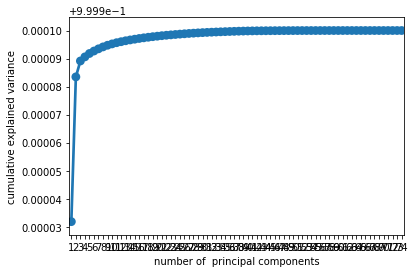

In [63]:
from sklearn.decomposition import PCA

# Instantiate PCA without specifying number of components
pca_all = PCA()

# Fit to scaled data
pca_all.fit(robust_data)

# Save cumulative explained variance
cum_var = (np.cumsum(pca_all.explained_variance_ratio_))
n_comp = [i for i in range(1, pca_all.n_components_ + 1)]

# Plot cumulative variance
ax = sns.pointplot(x=n_comp, y=cum_var)
ax.set(xlabel='number of  principal components', ylabel='cumulative explained variance')
plt.show()

With just 25 components almost all of the variance of the original data is explained! This make us think that there were some highly correlated features in the original data.

Let's plot the first 25 principal components:

In [64]:
from mpl_toolkits.mplot3d import Axes3D

# Instantiate PCA with 3 components
pca_25 = PCA(25)

# Fit to scaled data
pca_25.fit(robust_data)

# Transform scaled data
data_25pc = pca_25.transform(robust_data)

### let's create a DataFrame that will have the principal component values

In [65]:
principal_components = pd.DataFrame(data = data_25pc)

In [66]:
principal_components.head()

0         1         2         3         4         5         6   \
0 -288.292556 -2.482040 -1.642595 -0.831020 -0.158108  0.757657 -1.884109   
1 -288.292619 -2.480365 -1.646648 -0.724044 -0.322674  1.106648  0.226832   
2 -288.292576 -2.480317 -1.648630 -0.818168 -0.147932  0.818504 -1.909289   
3 -288.292597 -2.483333 -1.654126 -0.764836 -0.243053  0.924393 -0.920702   
4 -288.292609 -2.480502 -1.645046 -0.735354 -0.286986  1.043504 -0.126121   

         7         8         9         10        11        12        13  \
0  1.814646  1.295180  0.852594 -2.263969 -1.697475 -0.212633  0.195170   
1  1.862563  0.950747  0.751875 -2.275626 -1.823143 -0.275276  1.159188   
2  1.823558  1.313240  0.842103 -2.240802 -1.596350 -1.339760  0.598505   
3  1.810932  1.069477  0.748336 -2.364417 -1.759924 -0.330092 -1.022806   
4  1.887099  1.031704  0.772445 -2.209426 -1.715449 -1.102823  2.154396   

         14        15        16        17        18        19        20  \
0 -1.019037  0.451033 -0.513884 -0.132189 -0.447055  0.110475  0.038242   
1 -0.420795  1.311008 -0.430970  0.161667  0.174253  0.176395 -0.142677   
2 -1.380459  0.009485 -0.485235 -0.076994 -0.449812  0.064053  0.121218   
3 -0.218024  1.545661 -0.492401 -0.209051 -0.482491  0.150428  0.181481   
4 -0.886494  0.595998 -0.538333 -0.477807 -1.035288  0.075739  0.130791   

         21        22        23        24  
0 -0.557590  0.370735 -1.152697  0.265572  
1 -1.053587 -0.419924  0.225722  0.520236  
2  0.108540  0.607310 -0.584723  0.357080  
3 -1.000891 -0.293406  0.203903  0.412152  
4 -0.538553  0.153789  0.203044  0.163938

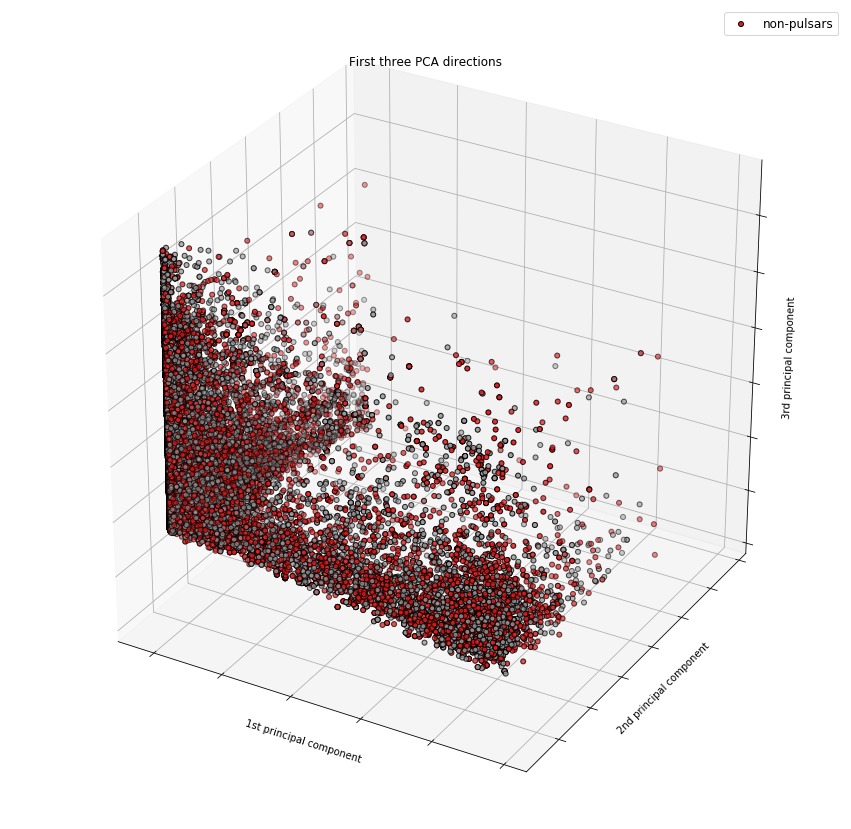

In [68]:
# Render the 3D plot
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(data_25pc[:, 0], data_25pc[:, 1], data_25pc[:, 2], c=labels,
           cmap=plt.cm.Set1, edgecolor='k', s=25, label=final_dataset['skip_2'])

ax.legend(["non-pulsars"], fontsize="large")

ax.set_title("First three PCA directions")
ax.set_xlabel("1st principal component")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd principal component")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd principal component")
ax.w_zaxis.set_ticklabels([])

plt.show()

### 4- Machine Learning Algorithm

### a- Light GBM

In [4]:
!pip install lightGBM

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, roc_auc_score
from datetime import datetime
import lightgbm as lgb

In [106]:
X = principal_components.iloc[:,:].values
Y = labels.values

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,stratify=Y)

In [108]:
train_data = lgb.Dataset(X_train,label=y_train)

In [109]:
#setting parameters for lightgbm
param = {'num_leaves':150, 'objective':'binary','max_depth':7,'learning_rate':.05,'max_bin':200}
param['metric'] = ['auc', 'binary_logloss']

In [110]:
#training our model using light gbm
num_round = 50
start = datetime.now()
lgbm = lgb.train(param,train_data,num_round)
stop = datetime.now()

[LightGBM] [Info] Number of positive: 65118, number of negative: 60792
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011535 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5000
[LightGBM] [Info] Number of data points in the train set: 125910, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.517179 -> initscore=0.068743
[LightGBM] [Info] Start training from score 0.068743
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

In [111]:
#Execution time of the model
execution_time_lgbm = stop-start
execution_time_lgbm

datetime.timedelta(microseconds=697650)

In [112]:
#predicting on test set
yprediction = lgbm.predict(X_test)
yprediction[0:20]  # showing first 20 predictions

array([0.91704392, 0.67116915, 0.72340818, 0.48195708, 0.83951185,
       0.80760684, 0.95230415, 0.95248988, 0.92278034, 0.72754168,
       0.04186378, 0.04186378, 0.85201831, 0.82366156, 0.76653225,
       0.04186378, 0.65140653, 0.80526886, 0.04186378, 0.90127216])

In [113]:
yprediction.shape

(41970,)

In [114]:
for i in range(0,41970):
    if yprediction[i]>=0.5:
        yprediction[i]=1
    else:
        yprediction[i]=0

In [117]:
# Calculating accuracy
accuracy_lgbm = accuracy_score(yprediction,y_test)
accuracy_lgbm

0.8823445318084346

In [118]:
# Confusion Matrix
confusion_matrix = confusion_matrix(y_test,yprediction)
confusion_matrix

array([[17002,  3262],
       [ 1676, 20030]], dtype=int64)

In [120]:
def plot_confusion_matrix(cm,titre='Confusion Matrix'):
    plt.imshow(cm,cmap=plt.cm.Blues)
    plt.title(titre)
    plt.colorbar()
    labels = ['positif','negatif']
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks,labels,rotation=45)
    plt.yticks(tick_marks,labels)
    plt.tight_layout()
    plt.xlabel('True Labels')
    plt.ylabel('Predictive Labels')

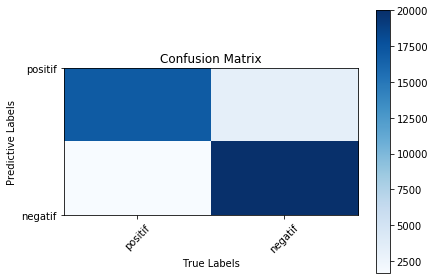

In [121]:
plot_confusion_matrix(confusion_matrix)

In [119]:
# F1_score
F1Score = f1_score(y_test,yprediction)
F1Score

0.8902617894128627

The F1_score reachs almost **90%** which is pretty good. 

In [124]:
#calculating roc_auc_score for light gbm. 
auc_lgbm = roc_auc_score(y_test,yprediction)
auc_lgbm

0.8809055990275093

### Save our Model

In [125]:
import pickle

In [128]:
file = open('lightGBM_Model.pkl','wb')
pickle.dump(lgbm,file)

### b- LogisticRegression

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Flatten
from keras.layers import ConvLSTM2D

In [5]:
def to_sequences(dataset, seq_size=1):
    x = []
    y = []
    for i in range(len(dataset)-seq_size-1):
        window = dataset[i:(i+seq_size),0]
        x.append(window)
        y.append(dataset[i+seq_size,0])
    return np.array(x), np.array(y)

In [6]:
seq_size = 1

In [ ]:
X_train, y_train = to_sequences(X_train)